In [1]:
# import qiskit 

In [2]:
# from qiskit import Aer 

In [2]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [3]:
# IBMQ.save_account('0411be6664ec0308d5f3a8dcb3bf985fa9a7c25e1dd020b245db3804c027977d84ebe17c31bf4dfdf9faaa60ade63ec29446d2b0f16524980cc42719d090c3b8')

Credentials already present. Set overwrite=True to overwrite.


In [4]:
provider = IBMQ.load_account()

In [46]:
q = QuantumRegister(8)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [47]:
# initialize in a superposition of all possible states 
qc.x(q[4])
qc.h(q[0:5])
qc.barrier(q)

In [48]:
qc.barrier(q)

# build oracle. ex: to find 1010 state
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2], q[3]], q[4], q[5:7])    # control qubits, target qubit, ancilla qubits = number of control qubits - 2
qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [49]:
qc.barrier(q)
qc.h(q[0:4])
qc.barrier(q)
qc.x(q[0:4])
qc.barrier(q)
qc.h(q[3])
qc.barrier(q)
qc.mct([q[0], q[1], q[2]], q[3], q[5:6])
qc.barrier(q)
qc.h(q[3])
qc.barrier(q)
qc.x(q[0:4])
qc.barrier(q)
qc.h(q[0:4])
qc.barrier(q)


In [50]:
qc.measure(q[0:4], c[0:4])

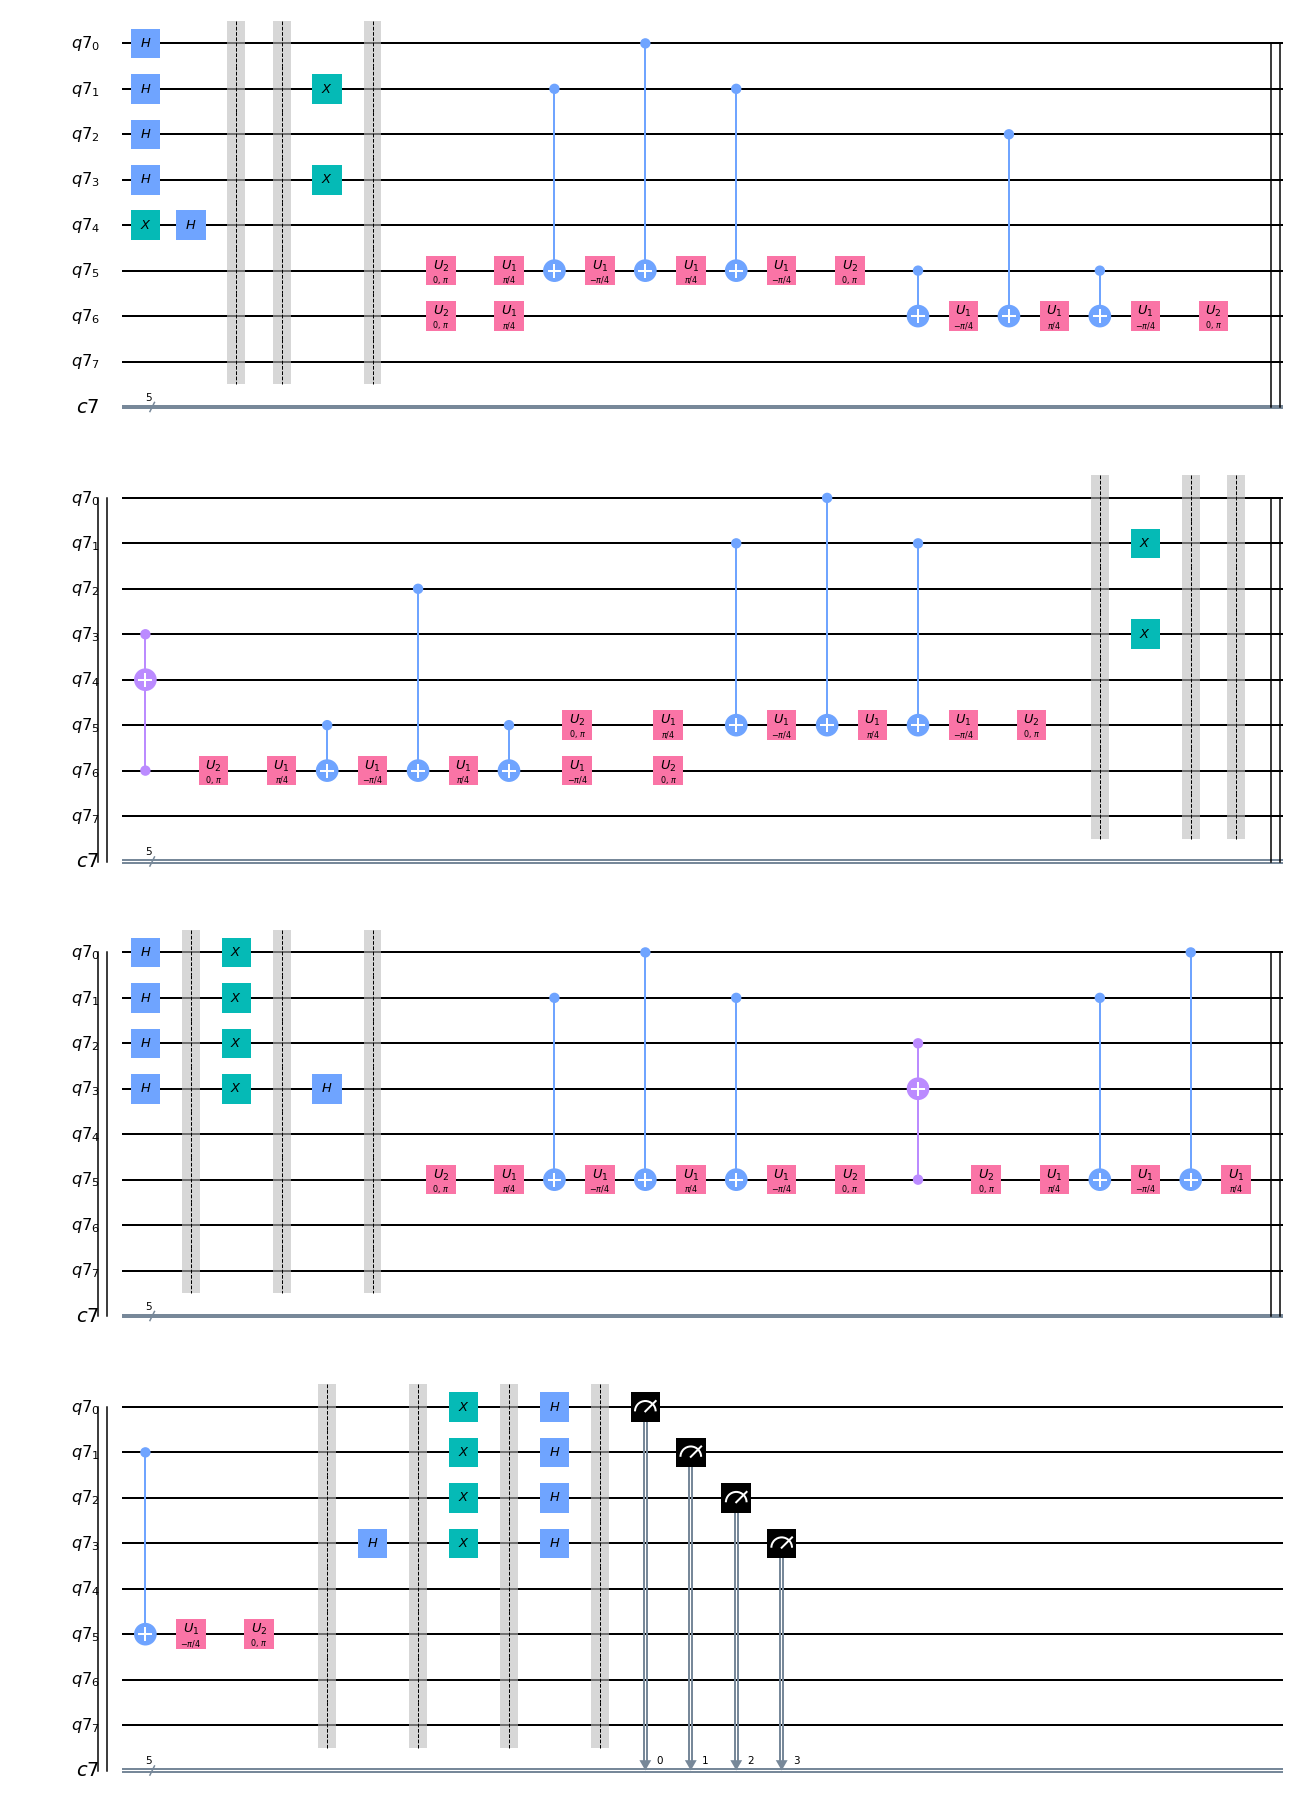

In [51]:
qc.draw(output='mpl')

In [52]:
# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)

{'01010': 35, '01111': 32, '00111': 35, '00000': 49, '01001': 30, '01101': 26, '00110': 28, '00011': 30, '00001': 33, '01110': 33, '00010': 43, '01100': 30, '01011': 30, '01000': 38, '00100': 29, '00101': 499}


In [ ]:
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = backend.retrieve_job('5e4580133003870018864ed8')
# counts = job.result().get_counts()
# print(counts)

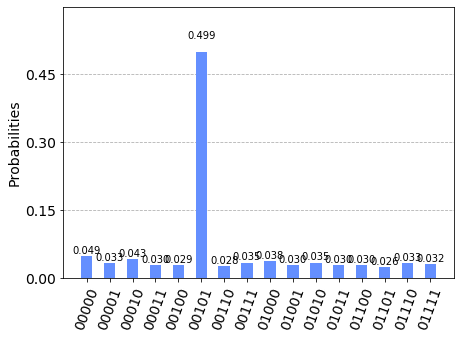

In [53]:
plot_histogram(count)